# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

The testing results demonstrated effectiveness of applying Capomulin or Ramicane for mice. Both show the lowest means (40.69 mm^3 and 40.22 mm^3), medians (24.95 mm^3 and 23.49 mm^3) and standard deviations (4.99 mm^3 and 4.85 mm^3) for tumor sizes mice tested respectively. The data is negatively skewed thich means that more than 50% of mice have tumor size below the mean for both drugs.
Four boxpolts of tumor sizes at the last stage mice tested confirmed the conclusion above, since the distributions for Capomulin and Ramicane are below the two other drugs.
I would recommend using Capomulin or Ramicane as a treatment for mice cancer.   

Also, we can see association between mouse weight and tumor size. Scatter plot shows that if the relationship exists, then it is more likely a linear relation. The coefficient of determination r^2=0.84^2=0.71 is high (so the error is 0.29) and the model can be used for estimating tumor size based on mouse weight.    

In [36]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as linreg
import numpy as np

# Study data files
#mouse_metadata_path = "data/Mouse_metadata.csv"
#study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv("data/Mouse_metadata.csv")
study_results = pd.read_csv("data/Study_results.csv")

# Combine the data into a single dataset
# Display the data table for preview
mice = pd.merge(study_results, mouse_metadata,  how="left", on=["Mouse ID", "Mouse ID"])
mice.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [37]:
# Checking the number of mice.
mice_num=len(mice["Mouse ID"].unique())
mice_num

249

In [38]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicateRows = mice[mice.duplicated()]
#view duplicate rows
duplicateRows

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.0,0,Propriva,Female,21,26


In [39]:
  
# dropping duplicate values
# mice=mice.drop_duplicates(keep=False,inplace=False)


In [40]:
# Optional: Get all the data for the duplicate mouse ID. 

all_g989 = mice[mice['Mouse ID']=='g989']
all_g989

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [41]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# Checking the number of mice in the clean DataFrame.

indexG=mice[mice['Mouse ID']=='g989'].index
mice.drop(indexG, inplace=True)
mice_new_num=len(mice["Mouse ID"].unique())
mice_new_num


248

## Summary Statistics

In [42]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

reg_mean = mice.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
reg_median = mice.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
reg_var = mice.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
reg_std = mice.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
reg_sem = mice.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]

stat_summary = pd.DataFrame({'Mean': reg_mean, 'Median': reg_median, 
'Variance': reg_var, 'St. Deviation': reg_std, 'St. Error': reg_sem})

# Display the DataFrame
stat_summary


,Mean,Median,Variance,St. Deviation,St. Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [43]:
# Using the aggregation method, produce the same summary statistics in a single line.

reg_totmean = mice["Tumor Volume (mm3)"].mean()
reg_totmedian = mice["Tumor Volume (mm3)"].median()
reg_totvar = mice["Tumor Volume (mm3)"].var()
reg_totstd = mice["Tumor Volume (mm3)"].std()
reg_totsem = mice["Tumor Volume (mm3)"].sem()

stat_totsummary = pd.DataFrame({'Mean': [reg_totmean], 'Median': [reg_totmedian], 
'Variance': [reg_totvar], 'St. Deviation': [reg_totstd], 'St. Error': [reg_totsem]})

stat_totsummary.index.name = None
# Display the DataFrame
stat_totsummary

,Mean,Median,Variance,St. Deviation,St. Error
0,50.435293,48.933454,79.462907,8.914197,0.205591


In [44]:
#mice['Tumor Volume (mm3)'].describe()

## Bar and Pie Charts

In [45]:
timepoints=mice.groupby(["Drug Regimen"]).count()["Timepoint"]
#timepoints

In [46]:
timepoints_v=timepoints.to_dict()
#timepoints_v

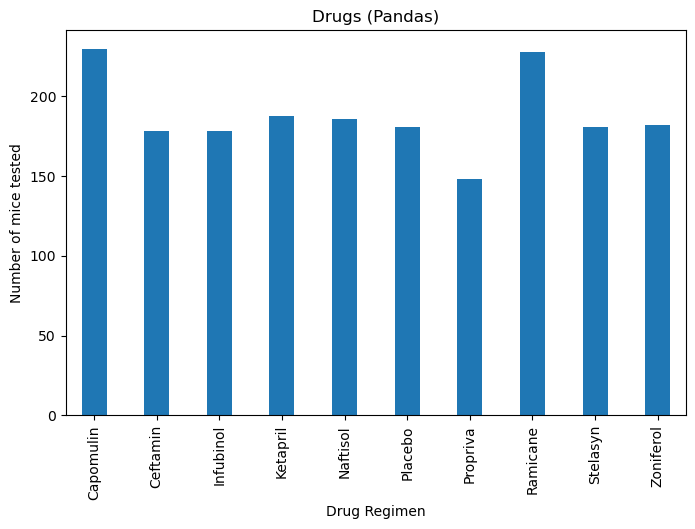

In [47]:
# Generate a bar plot showing the total number of timepoints for 
# all mice tested for each drug regimen using Pandas.


# Use DataFrame.plot() in order to create a bar chart of the data
timepoints.plot(kind="bar", figsize=(8,5), width=0.4)

# Set a title for the chart
plt.title("Drugs (Pandas)")
plt.ylabel("Number of mice tested")
plt.show()

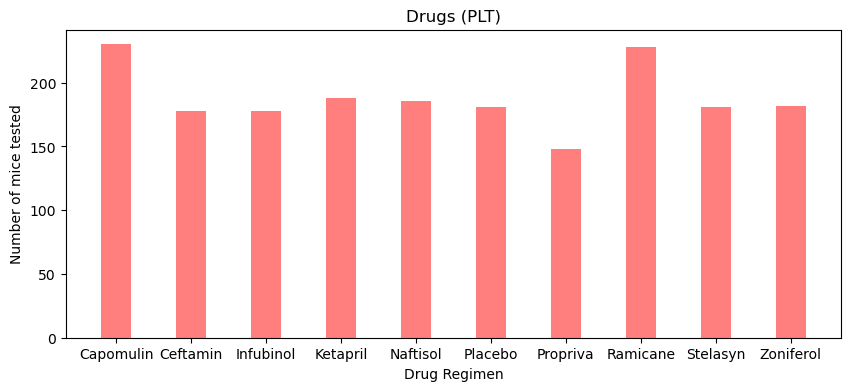

In [48]:
# Generate a bar plot showing the total number of 
# timepoints for all mice tested for each drug regimen using pyplot.

x_axis = np.arange(len(timepoints))
tick_locations = [value for value in x_axis]


plt.figure(figsize=(10, 4))
plt.bar(x_axis, timepoints, width= 0.4, color='r', alpha=0.5, align="center")
plt.xticks(tick_locations, timepoints_v)
plt.title("Drugs (PLT)")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of mice tested")
plt.show()

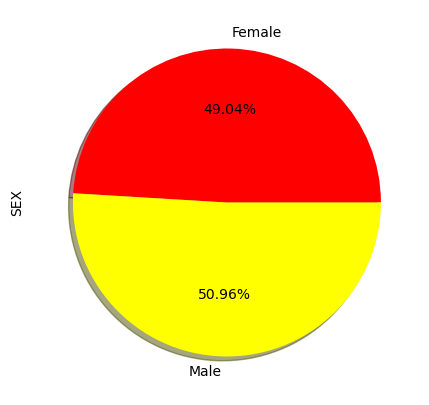

In [49]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex=mice.groupby(["Sex"]).count()["Mouse ID"]
pie=sex.plot(kind="pie", figsize=(5,5), autopct="%1.2f%%", colors=['red', 'yellow'], shadow=True, 
labeldistance=1.1)
pie.set_ylabel("SEX")
plt.show()

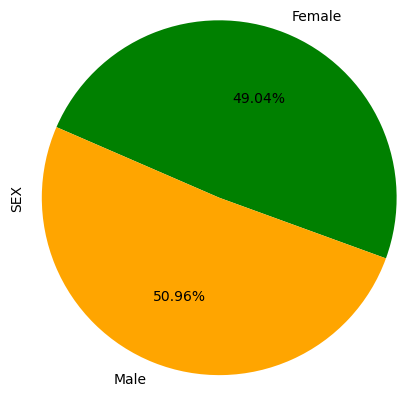

In [50]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.pie(sex, explode=None, labels=['Female', 'Male'], colors=['green', 'orange'], pctdistance=0.6, 
shadow=False, labeldistance=1.1, radius=1.2, autopct="%1.2f%%", startangle=340)
plt.ylabel("SEX")
plt.show()

## Quartiles, Outliers and Boxplots

In [51]:

tumor_volume = mice[mice['Drug Regimen'].isin(['Capomulin','Ramicane','Infubinol','Ceftamin'])]

tumor_volume.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
29,c326,0,45.0,0,Infubinol,Female,18,25
30,c139,0,45.0,0,Infubinol,Male,11,28
31,v339,0,45.0,0,Infubinol,Male,20,26
32,a577,0,45.0,0,Infubinol,Female,6,25


In [52]:
tumor_vol = tumor_volume.groupby(['Drug Regimen', 'Mouse ID'])['Timepoint'].max()
tumor_vol

Drug Regimen  Mouse ID
Capomulin     b128        45
              b742        45
              f966        20
              g288        45
              g316        45
                          ..
Ramicane      s508        45
              u196        45
              w678         5
              y449        15
              z578        45
Name: Timepoint, Length: 100, dtype: int64

In [53]:
tumor=pd.merge(tumor_vol, tumor_volume, how="left", on=["Mouse ID", "Timepoint"])
tumor=pd.merge(mouse_metadata, tumor,how="left", on=["Mouse ID", "Mouse ID"])

tumor=tumor.dropna()
tumor=tumor.drop(columns=['Drug Regimen_y', 'Sex_y', 'Age_months_y', 'Weight (g)_y'])
tumor=tumor.rename(columns={"Drug Regimen_x": "Drug Regimen", "Sex_x": "Sex", 
"Age_months_x": "Age_months", "Weight (g)_x": "Weight (g)"}, errors="raise")
tumor.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45.0,22.050126,1.0
1,s185,Capomulin,Female,3,17,45.0,23.343598,1.0
2,x401,Capomulin,Female,16,15,45.0,28.484033,0.0
3,m601,Capomulin,Male,22,17,45.0,28.430964,1.0
4,g791,Ramicane,Male,11,16,45.0,29.128472,1.0


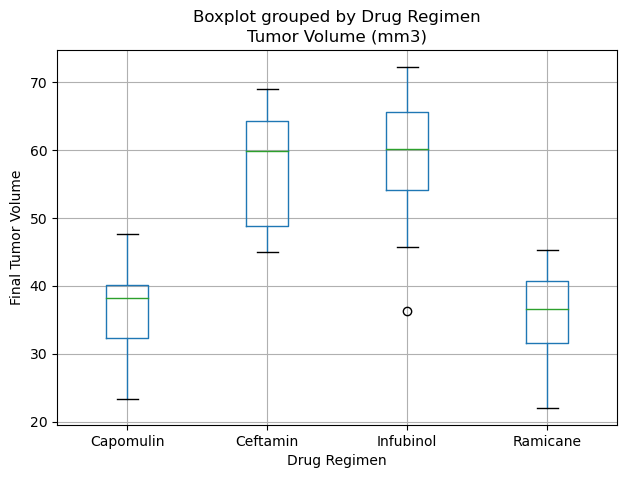

In [54]:
tumor.boxplot(column=['Tumor Volume (mm3)'], by='Drug Regimen', fontsize=10,
grid=True, figsize=(7,5), widths=0.3, showfliers=None, rot=0) 
plt.ylabel("Final Tumor Volume")
plt.show()


In [55]:
quart= tumor.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].describe()

quart['IQR'] = quart['75%'] - quart['25%']
quart['Low Outlr Bound'] = quart['25%']-1.5*quart["IQR"]
quart['High Outlr Bound'] = quart['75%']+1.5*quart["IQR"]
quart['Any Outliers'] = (quart['max']>quart['High Outlr Bound'])|(quart['min']<quart['Low Outlr Bound'])
quart=quart.drop(columns=['count', 'mean', 'std'])
quart=quart.rename(columns={"50%": "Median"}, errors="raise")
quart

,min,25%,Median,75%,max,IQR,Low Outlr Bound,High Outlr Bound,Any Outliers
Drug Regimen,,,,,,,,,
Capomulin,23.343598,32.377357,38.125164,40.159220,47.685963,7.781863,20.704562,51.832015,False
Ceftamin,45.000000,48.722078,59.851956,64.299830,68.923185,15.577752,25.355450,87.666458,False
Infubinol,36.321346,54.048608,60.165180,65.525743,72.226731,11.477135,36.832905,82.741446,True
Ramicane,22.050126,31.560470,36.561652,40.659006,45.220869,9.098537,17.912664,54.306811,False


In [56]:
outlier=tumor.loc[(tumor['Drug Regimen'] =='Infubinol') & 
(tumor['Tumor Volume (mm3)']<quart['Low Outlr Bound'][2])|
(tumor['Tumor Volume (mm3)']>quart['High Outlr Bound'][2]),:]
outlier=outlier['Tumor Volume (mm3)'].values
print(f'The low outlier for Infubinol is {outlier}')

The low outlier for Infubinol is [36.3213458]


## Line and Scatter Plots

In [57]:
#line_df = mice.loc[['Capomulin'], ['Mouse ID', 'Timepoint','Tumor Volume (mm3)']]
#line_df

In [58]:
line_df=mice[mice['Mouse ID'] == 'b128']
line_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
472,b128,5,45.651331,0,Capomulin,Female,9,22
679,b128,10,43.270852,0,Capomulin,Female,9,22
719,b128,15,43.784893,0,Capomulin,Female,9,22
933,b128,20,42.731552,0,Capomulin,Female,9,22
1268,b128,25,43.262145,1,Capomulin,Female,9,22
1400,b128,30,40.605335,1,Capomulin,Female,9,22
1547,b128,35,37.967644,1,Capomulin,Female,9,22
1629,b128,40,38.379726,2,Capomulin,Female,9,22
1764,b128,45,38.982878,2,Capomulin,Female,9,22


In [59]:
#line_df = mice.loc[['Capomulin'], ['Mouse ID', 'Timepoint','Tumor Volume (mm3)']]
#line_df

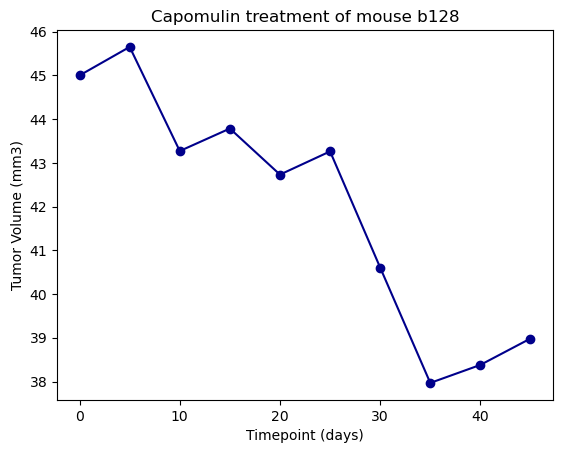

In [60]:
plt.plot(line_df["Timepoint"], line_df["Tumor Volume (mm3)"], c='Darkblue', marker ='o')
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin treatment of mouse b128")
plt.show() 

In [61]:
scatter=mice[mice['Drug Regimen'] == 'Capomulin']
scatter_df=scatter.groupby(['Mouse ID']).mean()
#scatter_df

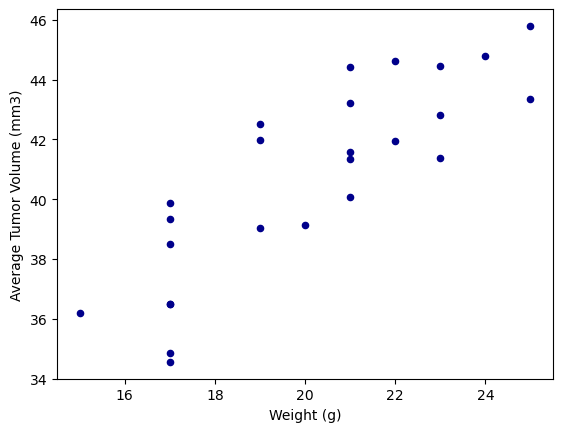

In [62]:

scatter_df.plot.scatter('Weight (g)','Tumor Volume (mm3)', c='DarkBlue')
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

In [63]:
correlation = scatter_df['Weight (g)'].corr(scatter_df['Tumor Volume (mm3)'])
print(f'The correlation between mouse weight and the average tumor volume r = {correlation.round(decimals = 3)}')

The correlation between mouse weight and the average tumor volume r = 0.842


Linear regression model is y = 0.95x + 21.55


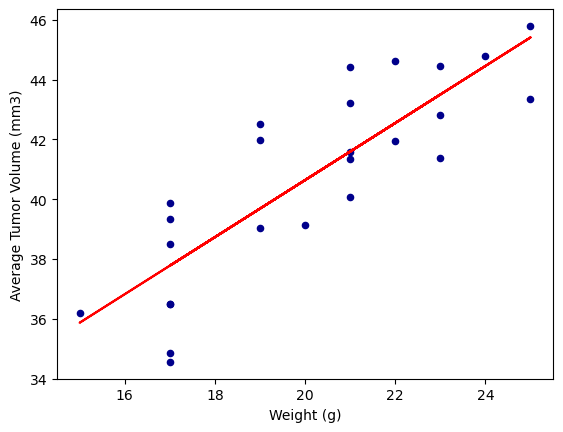

In [64]:
scatter_df.plot.scatter('Weight (g)','Tumor Volume (mm3)', c='DarkBlue')

(slope, intercept, rvalue, pvalue, stderr)=linreg.linregress(scatter_df['Weight (g)'], scatter_df['Tumor Volume (mm3)'])
regress_values = scatter_df['Weight (g)'] * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
plt.plot(scatter_df['Weight (g)'], regress_values,'r-')
plt.annotate(line_eq, (5.8,0.8), color='red')
plt.xlabel('Weight (g)')
plt.ylabel("Average Tumor Volume (mm3)")
print(f'Linear regression model is {line_eq}')
plt.show()